#### Problem Definition 
We will predict the age of abalone mollusks based on the attributes.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
df = pd.read_csv('devrimakkoy/Data_Science_Projects/Data/abalone.csv')

In [7]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [9]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [10]:
df.shape

(4177, 9)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscera weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050
Rings,4177.0,9.933684,3.224169,1.0000,8.0000,9.0000,11.000,29.0000


In [12]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

#### Visualizing the data
Gender, diameter and total weight may be important in determining the age of the abalone molluscs, and these are the features I want to visualize.

<AxesSubplot:ylabel='Sex'>

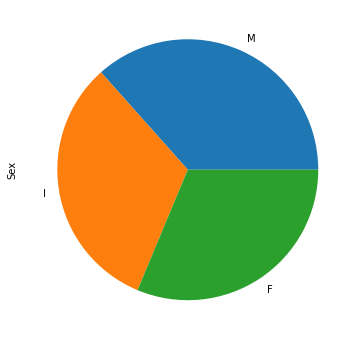

In [13]:
df['Sex'].value_counts().plot(kind='pie', figsize = (6,6))

In [14]:
corr = df.corr()
corr

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


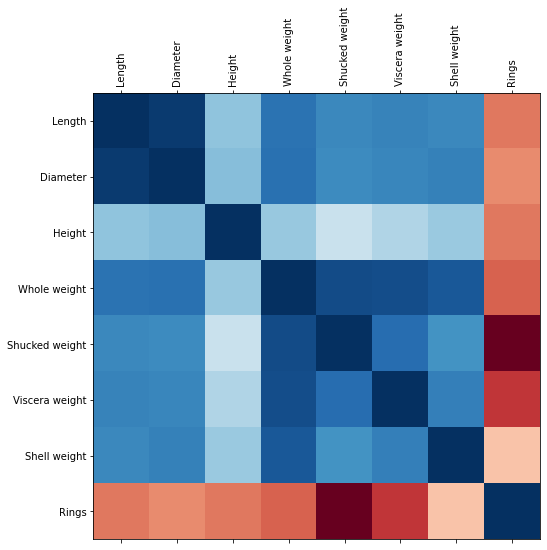

In [15]:
fig = plt.figure(figsize = (8,8))
plt.matshow(corr, cmap = 'RdBu', fignum = fig.number)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical');
plt.yticks(range(len(corr.columns)), corr.columns);

- fig is like a frame of the subplot. We can resize and reshape, but we cannot draw on it.
- ax (also called subplot) is the canvas. We can have many subplots in one figure.
- bar, barh, pie, and scatter are some of the examples of plot types in matplotlib.

#### I will compare 3 different groups: female, male, and infant abalones, and he number of rings in each group.

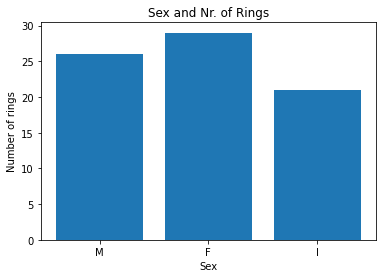

In [16]:
# Create the fig, ax
fig, ax = plt.subplots()

# Create bar plot of first 1000 data entries 
ax.bar(df["Sex"][:1000], df["Rings"][:1000])

#Add legend: x is horizonatal axis, y is vertical
ax.set(title="Sex and Nr. of Rings", 
       xlabel="Sex",
       ylabel="Number of rings");

#### I want to see if the diameter and the number or the rings mean something together.

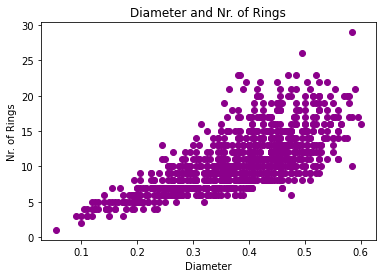

In [17]:
# Create a fig, ax
fig, ax = plt.subplots()

# Create a scatter plot with first 1000 data points
ax.scatter(df["Diameter"][:1000], df["Rings"][:1000], color="darkmagenta")

# Create a legend
ax.set(title="Diameter and Nr. of Rings",
       xlabel="Diameter",
       ylabel="Nr. of Rings");

#### I will try to find a relationship between the whole weight of an abalone mollusk, and its number of rings.

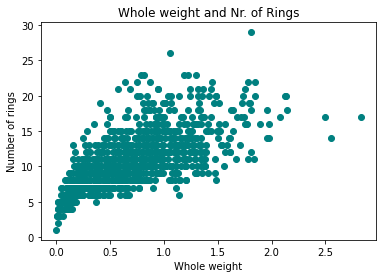

In [18]:
# Create fig, ax
fig, ax = plt.subplots()

# Create scatter plot of first 1000 data points
ax.scatter(df["Whole weight"][:1000], df["Rings"][:1000], color="teal")

#Create a legend
ax.set(title="Whole weight and Nr. of Rings",
       xlabel="Whole weight",
       ylabel="Number of rings");

Make sure all our data is numerical. At the most basic level, machines only understand numbers. So, to build a machine learning model, we need to convert all non-numeric categories into numbers. In this case, sex is our only non-numeric category. The sex column data type is Object.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


First, we need to use Pandas astype() method to convert object datatyope to a category. Then, we will replace the categorical values with a numeric value using cat.codes so that the machine learning algorithm understands us.

In [20]:
df["Sex"] = df["Sex"].astype("category").cat.as_ordered()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Sex             4177 non-null   category
 1   Length          4177 non-null   float64 
 2   Diameter        4177 non-null   float64 
 3   Height          4177 non-null   float64 
 4   Whole weight    4177 non-null   float64 
 5   Shucked weight  4177 non-null   float64 
 6   Viscera weight  4177 non-null   float64 
 7   Shell weight    4177 non-null   float64 
 8   Rings           4177 non-null   int64   
dtypes: category(1), float64(7), int64(1)
memory usage: 265.4 KB


In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [23]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


##### Our initial task was to determine the age of the abalone molluscs based on the number of rings. We know that age is determined by the number of rings + 1.5. Therefore, we need to create a new ["Age"] column in our data and drop the ["Rings"] column.

In [25]:
# Add age column
df["Age"] = df["Rings"] + 1.5
# Drop rings column
df.drop("Rings", axis=1, inplace=True)

In [26]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [27]:
# Split data into X and y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [28]:
print(X)

[[2.     0.455  0.365  ... 0.2245 0.101  0.15  ]
 [2.     0.35   0.265  ... 0.0995 0.0485 0.07  ]
 [0.     0.53   0.42   ... 0.2565 0.1415 0.21  ]
 ...
 [2.     0.6    0.475  ... 0.5255 0.2875 0.308 ]
 [0.     0.625  0.485  ... 0.531  0.261  0.296 ]
 [2.     0.71   0.555  ... 0.9455 0.3765 0.495 ]]


In [29]:
print(y)

[16.5  8.5 10.5 ... 10.5 11.5 13.5]


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [31]:
print(X_train)

[[2.     0.455  0.35   ... 0.1815 0.144  0.16  ]
 [1.     0.255  0.195  ... 0.0285 0.017  0.021 ]
 [1.     0.52   0.41   ... 0.2165 0.0915 0.184 ]
 ...
 [1.     0.32   0.24   ... 0.07   0.0265 0.0425]
 [0.     0.525  0.41   ... 0.416  0.163  0.18  ]
 [1.     0.295  0.225  ... 0.0485 0.032  0.04  ]]


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [33]:
print(X_train)

[[ 1.15577822 -0.5686352  -0.5791403  ... -0.79973871 -0.33233002
  -0.56585054]
 [-0.06157835 -2.22641025 -2.13388734 ... -1.48904213 -1.49196567
  -1.55578814]
 [-0.06157835 -0.02985831  0.02269726 ... -0.64205492 -0.81170696
  -0.39492606]
 ...
 [-0.06157835 -1.68763336 -1.68250917 ... -1.30207421 -1.40522127
  -1.4026683 ]
 [-1.27893491  0.01158607  0.02269726 ...  0.25674268 -0.15884123
  -0.42341347]
 [-0.06157835 -1.89485524 -1.83296856 ... -1.39893711 -1.35500083
  -1.42047293]]


In [34]:
print(X_test)

[[-1.27893491 -0.69296833 -0.67944656 ... -0.77045458 -0.85279641
  -0.77950613]
 [ 1.15577822  0.34314108  0.27346291 ...  0.99335123  0.01921307
  -0.23824528]
 [ 1.15577822 -1.2731896  -1.28128413 ... -1.20971656 -1.11302961
  -1.17120807]
 ...
 [-1.27893491  0.26025232  0.37376917 ...  0.86495158  0.58076891
   0.27808908]
 [-1.27893491  1.1720286   1.22637238 ...  1.24114005  1.47560587
   1.39265912]
 [-1.27893491  0.63325171  0.9254536  ...  1.19158228  0.94144299
   0.78730159]]


In [35]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [37]:
def scatter_y(true_y, predicted_y):
    """Scatter-plot the predicted vs true number of rings
    
    Plots:
       * predicted vs true number of rings
       * perfect agreement line
       * +2/-2 number dotted lines

    Returns the root mean square of the error
    """
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(true_y, predicted_y, '.k')
    
    ax.plot([0, 30], [0, 30], '--k')
    ax.plot([0, 30], [2, 32], ':k')
    ax.plot([2, 32], [0, 30], ':k')
    
    rms = (true_y - predicted_y).std()
    
    ax.text(25, 3,
            "Root Mean Square Error = %.2g" % rms,
            ha='right', va='bottom')

    ax.set_xlim(0, 30)
    ax.set_ylim(0, 30)
    
    ax.set_xlabel('True number of rings')
    ax.set_ylabel('Predicted number of rings')
    
    return rms

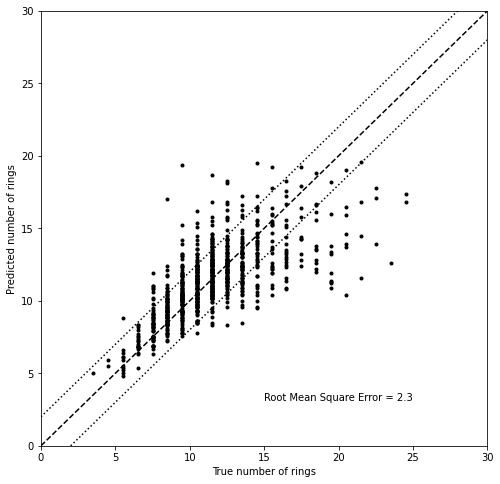

In [38]:
predicted_test_y = regressor.predict(X_test)
rms_random_forest = scatter_y(y_test, predicted_test_y)

#### Evaluation metrics
Now that we've trained our model, we need to assess how well it works. There are several evaluation criteria for classification and regression models. The most common methods for evaluating a regression model are:

- Mean Absolute Error (MAE)
Measures the average magnitude of the errors in predictions, without considering their direction. In other words, MAE → actual answer - predicted answer. The lower the value, the better.

- Mean Square Error (MSE)
Shows how close a regression line is to a set of points. The lower the MSE, the better.

- Root Mean Square Error (RMSE)
RMSE is used to return the MSE error to the original unit by taking the square root of it.

- R2 score
R2 score is the proportion of the variance in the dependent variable that is predicted from the independent variables. Generally, a score higher than 0.7 is considered to have a good level of correlation, 0.5 to 0.7 is a moderate correlation, and a score below 0.4 shows a low level of correlation.

In [39]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_true=y_test,y_pred=predicted_test_y)
print(mae)

1.5968899521531101


In [40]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true=y_test,y_pred=predicted_test_y)
print(mse)

5.1278229665071775


In [41]:
from sklearn.metrics import r2_score
r2 = r2_score(y_true=y_test,y_pred=predicted_test_y)
print(r2)

0.47629506977369485
